In [1]:
import matplotlib.pylab as plt
%matplotlib inline
import lasagne

Using gpu device 0: GeForce GTX TITAN Black (CNMeM is disabled, CuDNN 4007)


In [2]:
import sys
sys.path.append('../')
import ghiaseddin

import numpy as np

We need to import caffe in order to make the comparisons

In [3]:
sys.path.append('/home/yasser/installs/caffe/python/')
import caffe

/home/yasser/installs/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Net<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/yasser/installs/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Blob<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \
/home/yasser/installs/caffe/python/caffe/pycaffe.py:13: RuntimeWarning: to-Python converter for boost::shared_ptr<caffe::Solver<float> > already registered; second conversion method ignored.
  from ._caffe import Net, SGDSolver, NesterovSolver, AdaGradSolver, \


here is an image for our processing usage

In [4]:
image_addr = '/home/yasser/installs/caffe/examples/images/cat.jpg'

creating the vgg extractor of ghiaseddin

(4096,)


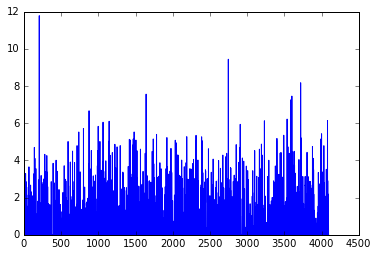

In [5]:
extractor = ghiaseddin.VGG16(ghiaseddin.settings.vgg16_weights)
ghiaseddin_feats = extractor.output_for_image(image_addr).flatten()

print ghiaseddin_feats.shape

plt.plot(ghiaseddin_feats)

creating the caffe's network

(4096,)


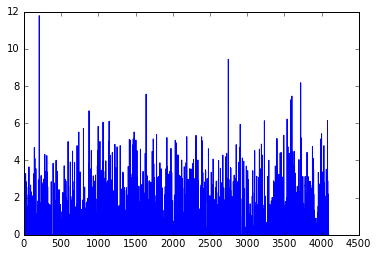

In [6]:
image = caffe.io.load_image(image_addr)
net = caffe.Net('/home/yasser/installs/caffe/models/VGG16/deploy.prototxt',
                '/home/yasser/installs/caffe/models/VGG16/VGG_ILSVRC_16_layers.caffemodel',
                caffe.TEST)
transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})
transformer.set_transpose('data', (2,0,1))
transformer.set_mean('data', np.array([104, 117, 123]))
transformer.set_raw_scale('data', 255)
transformer.set_channel_swap('data', (2,1,0))
transformed_image = transformer.preprocess('data', image)
net.blobs['data'].reshape(1, 3, 224, 224)
net.blobs['data'].data[...] = transformed_image
out = net.forward()

caffe_feats = net.blobs['fc7'].data.flatten()

print caffe_feats.shape
plt.plot(caffe_feats)

In [7]:
print np.all(ghiaseddin_feats == caffe_feats)

print np.linalg.norm(ghiaseddin_feats - caffe_feats)

False
6.00515e-05


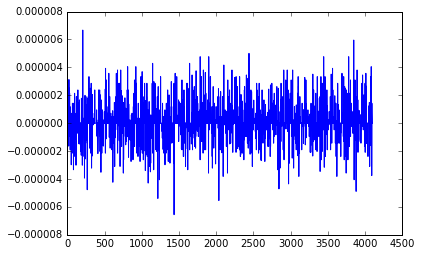

In [8]:
plt.plot(ghiaseddin_feats - caffe_feats)

It seems that the difference is very small. I guess it is good.